In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
column_name = ['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs',
               'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
               'ca', 'hsl', 'HeartDisease']

raw_data = pd.read_excel('/content/datasets/heart-disease.xlsx',
                         header=None, names=column_name)
print(raw_data.head(5))

   age  sex  cp  treshbps chol  fbs  ...  exang  oldpeak  slope  ca  hsl HeartDisease
0   63    1   1       145  233    1  ...      0      2.3      3   0    6            0
1   67    1   4       160  286    0  ...      1      1.5      2   3    3            1
2   67    1   4       120    ?    0  ...      1      2.6      2   2    7            1
3   37    1   3       130  250    0  ...      0      3.5      3   0    3            0
4   41    0   2       130  204    0  ...      0      1.4      1   0    3            0

[5 rows x 14 columns]


In [ ]:
print(raw_data.tail(5))

     age  sex  cp  treshbps chol  ...  oldpeak  slope  ca  hsl  HeartDisease
298   45    1   1       110  264  ...      1.2      2   0    7             1
299   68    1   4       144  193  ...      3.4      2   2    7             1
300   57    1   4       130  131  ...      1.2      2   1    7             1
301   57    0   2       130  236  ...      0.0      2   1    3             1
302   38    1   3       138  175  ...      0.0      1   ?    3             0

[5 rows x 14 columns]


In [ ]:
print(raw_data.describe())

              age         sex          cp  ...     oldpeak       slope  HeartDisease
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000    303.000000
mean    54.438944    0.679868    3.158416  ...    1.039604    1.600660      0.458746
std      9.038662    0.467299    0.960126  ...    1.161075    0.616226      0.499120
min     29.000000    0.000000    1.000000  ...    0.000000    1.000000      0.000000
25%     48.000000    0.000000    3.000000  ...    0.000000    1.000000      0.000000
50%     56.000000    1.000000    3.000000  ...    0.800000    2.000000      0.000000
75%     61.000000    1.000000    4.000000  ...    1.600000    2.000000      1.000000
max     77.000000    1.000000    4.000000  ...    6.200000    3.000000      1.000000

[8 rows x 11 columns]


In [ ]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshbps      303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  hsl           303 non-null    object 
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB
None


In [ ]:
clean_data = raw_data.replace('?', np.nan) #dropna 사용을 위해 nan으로 변경
clean_data = clean_data.dropna()
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshbps      296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  hsl           296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.7 KB
None


In [ ]:
#Heart-Disease 컬럼만 떼어내기
keep = column_name.pop() #list 자료형에 pop함수로 호출하면 맨 마지막 것만 빼내 리턴
print(keep)
print(column_name) #마지막 컬럼네임이 지워진 모습

HeartDisease
['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'hsl']


In [ ]:
training_data = pd.DataFrame(clean_data.iloc[:, 0:13], columns=column_name)  #iloc : 숫자로 인덱싱
target = pd.DataFrame(clean_data.iloc[:, 13], columns=[keep])
print(training_data.head())
print(target.head())

   age  sex  cp  treshbps   chol  fbs  ...  thalach  exang  oldpeak  slope   ca  hsl
0   63    1   1       145  233.0    1  ...      150      0      2.3      3  0.0  6.0
1   67    1   4       160  286.0    0  ...      108      1      1.5      2  3.0  3.0
3   37    1   3       130  250.0    0  ...      187      0      3.5      3  0.0  3.0
4   41    0   2       130  204.0    0  ...      172      0      1.4      1  0.0  3.0
5   56    1   2       120  236.0    0  ...      178      0      0.8      1  0.0  3.0

[5 rows x 13 columns]
   HeartDisease
0             0
1             1
3             0
4             0
5             0


In [ ]:
print(target['HeartDisease'].sum())

136


In [ ]:
print(target['HeartDisease'].mean()) # 이와다르게 특정 데이터가 희소한 경우, 편중된 데이터를 비율을 맞춰주어야 올바른 학습가능

0.4594594594594595


In [ ]:
#chol가 HeartDiesease에 얼마나 영향을 미치는지 모르지만, chol과 같이 데이터 단위가 큰 경우 스케일링을 통해 단위를 맞춰주어야 한다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data)
scaled_data = pd.DataFrame(scaled_data, columns=column_name)
print(scaled_data.head())

        age       sex        cp  ...     slope        ca       hsl
0  0.942285  0.692820 -2.236793  ...  2.264087 -0.718421  0.660262
1  1.385714  0.692820  0.876486  ...  0.645320  2.487397 -0.890830
2 -1.939999  0.692820 -0.161274  ...  2.264087 -0.718421 -0.890830
3 -1.496571 -1.443376 -1.199033  ... -0.973448 -0.718421 -0.890830
4  0.166286  0.692820 -1.199033  ... -0.973448 -0.718421 -0.890830

[5 rows x 13 columns]


In [ ]:
print(scaled_data.describe().T)

          count          mean       std  ...       50%       75%       max
age       296.0  4.500904e-18  1.001693  ...  0.166286  0.720571  2.494285
sex       296.0  2.850573e-17  1.001693  ...  0.692820  0.692820  0.692820
cp        296.0  1.200241e-16  1.001693  ... -0.161274  0.876486  0.876486
treshbps  296.0  6.067781e-16  1.001693  ... -0.097641  0.465747  3.846075
chol      296.0  1.997276e-17  1.001693  ... -0.084871  0.554717  6.089796
fbs       296.0  7.501507e-19  1.001693  ... -0.412263 -0.412263  2.425638
restecg   296.0  2.182939e-16  1.001693  ... -0.489853  1.020526  1.020526
thalach   296.0  6.458797e-16  1.001693  ...  0.145397  0.712830  2.284183
exang     296.0  5.926190e-17  1.001693  ... -0.692820  1.443376  1.443376
oldpeak   296.0 -7.951597e-17  1.001693  ... -0.215316  0.472766  4.429243
slope     296.0  1.155232e-16  1.001693  ...  0.645320  0.645320  2.264087
ca        296.0  6.526311e-17  1.001693  ... -0.718421  0.350185  2.487397
hsl       296.0 -2.663035

In [ ]:
#과적합이 일어났을때 accuracy는 높겠지만 모델성능이 떨어짐, 따라서 데이터를 훈련용, 검증용으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, target, test_size=0.3)
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape', Y_test.shape)

X_train shape: (207, 13)
Y_train shape: (207, 1)
X_test shape: (89, 13)
Y_test shape (89, 1)


In [ ]:
model = Sequential()
model.add(Dense(512, input_dim=13, activation='relu')) #퍼셉트론은 2의 거듭제곱수로 하는 것이 일반적 #모델에 관련된 파라미터는 하이퍼파라미터
model.add(Dropout(0.25)) #Dropout 망각 기능, 매 epoch 마다 랜덤하게 25%는 학습을 안한다
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid')) #이진분류에서는 마지막 퍼셉트론 1개, 엑티베이션은 시그모이드
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               7168      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [ ]:
model.compile(loss='mse', optimizer='adam',
              metrics=['binary_accuracy'])
fit_hist = model.fit(
    X_train, Y_train, batch_size=50, epochs=50, 
    validation_split = 0.2)
    #batch_size : 1 epoch당 50 문제씩 나눠서 학습(랜덤추출), batch_size마다 미분수행하기에 학습시간이 늘어남, epoch 수를 줄일 수 있음
    #validation_split : 학습데이터를 또 떼어내서 매 epoch마다 검증

Epoch 1/50
4/4 [==============================] - 1s 64ms/step - loss: 0.2342 - binary_accuracy: 0.6303 - val_loss: 0.1798 - val_binary_accuracy: 0.8571
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1790 - binary_accuracy: 0.7758 - val_loss: 0.1241 - val_binary_accuracy: 0.9048
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1390 - binary_accuracy: 0.8303 - val_loss: 0.0950 - val_binary_accuracy: 0.9048
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1304 - binary_accuracy: 0.8121 - val_loss: 0.0864 - val_binary_accuracy: 0.9048
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1252 - binary_accuracy: 0.8061 - val_loss: 0.0827 - val_binary_accuracy: 0.9048
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 0.1224 - binary_accuracy: 0.8121 - val_loss: 0.0911 - val_binary_accuracy: 0.8810
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1145 - bi

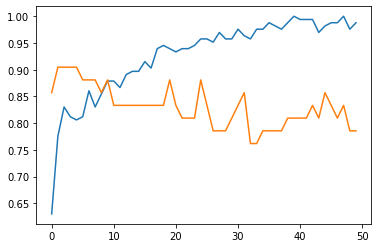

In [ ]:
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])
plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)  #verbose : 0을 주면 진행상황을 보여주지 않음, defalt : 1
print('Keras DNN model loss:', score[0])
print('Keras DNN model accuracy:', score[1])

Keras DNN model loss: 0.13065852224826813
Keras DNN model accuracy: 0.8202247023582458


In [ ]:
from sklearn.metrics import confusion_matrix #혼돈 매트릭스
from sklearn.metrics import f1_score
pred = model.predict(X_test)
pred = (pred > 0.5)
print(confusion_matrix(Y_test, pred))
print(f1_score(Y_test, pred, average='micro'))

[[37  8]
 [ 8 36]]
0.8202247191011236


<img src =' https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg' >

In [ ]:
my_sample = np.random.randint(89)
#0부터 88까지의 랜덤 randint : 정수값 / normal : 정규분포에서의 값 / uniform : 모든 동등한 확률 중 값
sample_data = np.array(X_test.iloc[my_sample])
sample_data = sample_data.reshape(-1, 13)
print(model.predict(sample_data))
print(Y_test.iloc[my_sample])

[[0.00084519]]
HeartDisease    0
Name: 93, dtype: int64
